<a href="https://colab.research.google.com/github/QuantumPower4/MetodosComputacionales20231/blob/main/RLC_Resonancia_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [ ]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        plt.legend(loc='best')

    plt.tight_layout;

In [ ]:
datos = "/content/datos xd lol jaja ayuda.txt"

In [ ]:
DataFrame = pd.read_csv(datos,sep="	",engine="python",names=["frec","delta","vpp1","vpp2","frec_ang","delta_rad"],decimal=",")

In [ ]:
DataFrame

,frec,delta,vpp1,vpp2,frec_ang,delta_rad
0,5500,-39.80,4.96,3.64,34557.519190,0.694641
1,5600,-38.20,4.96,3.68,35185.837720,0.666716
2,5700,-35.40,4.96,3.76,35814.156251,0.617847
3,5800,-33.40,4.92,3.80,36442.474782,0.582940
4,5900,-31.80,4.84,3.88,37070.793312,0.555015
5,6000,-28.60,4.84,3.94,37699.111843,0.499164
6,6100,-28.20,4.84,3.98,38327.430374,0.492183
7,6200,-26.80,4.80,4.04,38955.748904,0.467748
8,6300,-22.60,4.80,4.10,39584.067435,0.394444
9,6400,-21.20,4.80,4.12,40212.385966,0.370010


In [ ]:
def func0(x,A):
  return A

In [ ]:
frec_ang = np.array(DataFrame["frec_ang"])
vpp1 = np.array(DataFrame["vpp1"])

In [ ]:
params0, pcov0 = scipy.optimize.curve_fit(func0,frec_ang,vpp1)

In [ ]:
pcov0

array([[0.00013083]])

In [ ]:
params0, np.sqrt(np.diag(pcov0))

(array([4.78243902]), array([0.01143796]))

In [ ]:
r2_score(vpp1,[params0[0]]*len(vpp1))

-2.220446049250313e-16

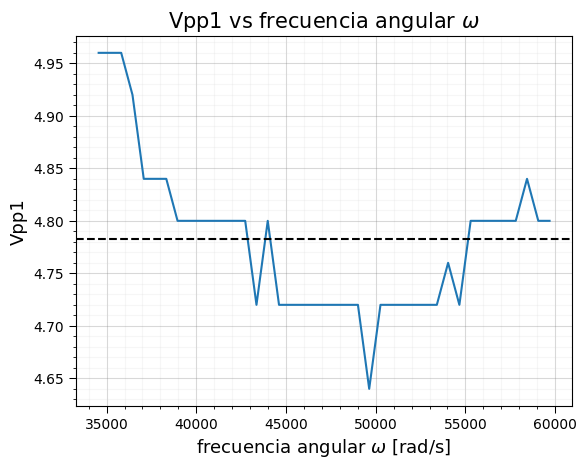

In [ ]:
plt.plot(frec_ang,vpp1)
plt.axhline(params0[0],linestyle="--",color="black")
formato_grafica("Vpp1 vs frecuencia angular $\omega$","frecuencia angular $\omega$ [rad/s]","Vpp1")
plt.savefig("./vpp1.png")

In [ ]:
vpp2 = np.array(DataFrame["vpp2"])

In [ ]:
def func1(x,A,B,C):
  return (A*B*x) / np.sqrt((x*B)**2+(C**2-x**2)**2)

In [ ]:
params1, pcov1 = scipy.optimize.curve_fit(func1,frec_ang,vpp2,p0=[4,4,4])

In [ ]:
params1, np.sqrt(np.diag(pcov1)), pcov1

(array([4.34658788e+00, 4.28012358e+04, 4.66765796e+04]),
 array([3.24348160e-03, 2.63052582e+02, 3.75843101e+01]),
 array([[ 1.05201729e-05, -6.35538653e-01, -1.58031683e-02],
        [-6.35538653e-01,  6.91966611e+04,  2.81485469e+03],
        [-1.58031683e-02,  2.81485469e+03,  1.41258037e+03]]))

In [ ]:
params1[2]

46676.579628352585

In [ ]:
r2_score(vpp2,func1(frec_ang,*params1))

0.9961776765099079

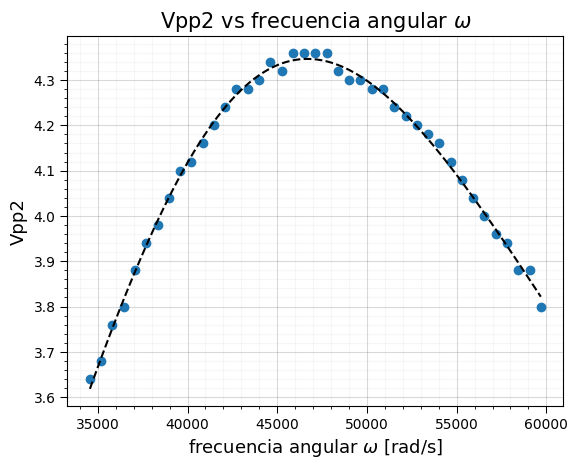

In [ ]:
x_ = np.linspace(frec_ang[0],frec_ang[-1],100)
plt.plot(x_,func1(x_,*params1),linestyle="--",color="black")
plt.scatter(frec_ang,vpp2)
formato_grafica("Vpp2 vs frecuencia angular $\omega$","frecuencia angular $\omega$ [rad/s]","Vpp2")
plt.savefig("./vpp2.png")

In [ ]:
def func2(x,A,B):
  return np.arctan((A**2-x**2)/(x*B))

In [ ]:
angulo_rad = np.array(DataFrame["delta_rad"])

In [ ]:
params2, pcov2 = scipy.optimize.curve_fit(func2, frec_ang, angulo_rad, p0=[4,4])

In [ ]:
params2, np.sqrt(np.diag(pcov2)), pcov2

(array([47348.33072702, 38379.32999989]),
 array([ 51.94969055, 301.04103323]),
 array([[ 2698.77034814,  2778.06413403],
        [ 2778.06413403, 90625.70368555]]))

In [ ]:
r2_score(angulo_rad,func2(frec_ang,*params2))

0.9983122593463452

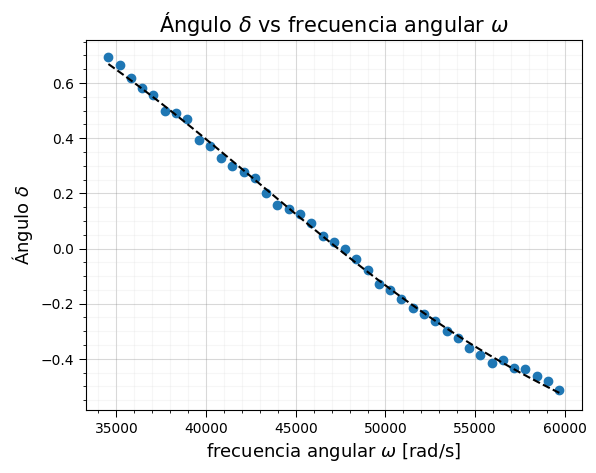

In [ ]:
plt.plot(x_,func2(x_,*params2),linestyle="--",color="black")
plt.scatter(frec_ang,angulo_rad)
formato_grafica("Ángulo $\delta$ vs frecuencia angular $\omega$","frecuencia angular $\omega$ [rad/s]","Ángulo $\delta$")
plt.savefig("./delta.png")